<a href="https://colab.research.google.com/github/Promilasharan/Predicting-Binding-Affinity-of-Drug-Compounds-for-BACE1/blob/main/Comparison_of_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1). Comparing Regressors**

we will be comparing several ML algorithms for build regression models of BACE1 inhibitors

##**1.1). Import Libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

##**1.2). Load the data set**

In [7]:
df = pd.read_csv('BACE1_bioactivity_final_df_with_fp.csv')

df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Name.1,pIC50
0,CHEMBL78946,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL406146,6.38
1,CHEMBL406146,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL78946,8.70
2,CHEMBL324109,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL324109,6.34
3,CHEMBL116826,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL116826,4.47
4,CHEMBL332948,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL143239,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,CHEMBL5188873,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5188873,6.47
5943,CHEMBL5192597,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5192597,6.11
5944,CHEMBL5220695,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5184529,6.08
5945,CHEMBL5219239,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CHEMBL5220695,7.82


In [8]:
#drop "Name" column
df.drop(columns=["Name", "Name.1"], inplace=True)



In [9]:
df.shape

(5947, 882)

##**1.3 Sampling of dataset (for LazyPredict)**

In [10]:
# Randomly sample 'n' rows from the DataFrame
n = 100  # Replace with the number of rows you want to sample
df = df.sample(n)

In [11]:
df.shape

(100, 882)

##**1.3). Input features**

The *BACE1* data set contains 881 input features and 1 output variable (pIC50 values).

###**1.3.1). Input Features**

In [12]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
2705,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2312,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1662,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
736,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2124,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
664,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape

(100, 881)

###**1.3.1). Output Features**

In [14]:
y = df.pIC50
y

2705   7.92
2312   6.95
5      7.68
1662   5.00
736    6.21
       ... 
367    3.74
5412   7.74
2124   8.26
664    7.66
2257   4.96
Name: pIC50, Length: 100, dtype: float64

##**1.4). Removing low_variance features from dataset**

- removing low variance features is a common technique used for binary data, such as binary features like binary fingerprints, where the majority of the values are 0 or 1.

- When dealing with binary data, low variance features are those that are almost constant, meaning they have very little variability in their values (e.g., 99% of values are 0 and only 1% are 1 or vice versa). These features might not provide much useful information for modeling, and removing them can reduce the model's complexity and improve performance.



In [15]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape


(100, 163)

In [16]:
# Perform data splitting using 75/25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(75, 163)

In [18]:
X_test.shape

(25, 163)

##**Compare ML algorithms**

- I tried LazyRegressor on df (original) and df after removing variance; both took more than 30 min without output. as our aim to find out the regressor which'll perform better on the given datatset so we can proceed with sampling tech (taking just 20% of original dataset and try LazyRegressor on that)

In [19]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:07<00:00,  5.47it/s]


##**Data visualization of model performance**

[(0.0, 1.0)]

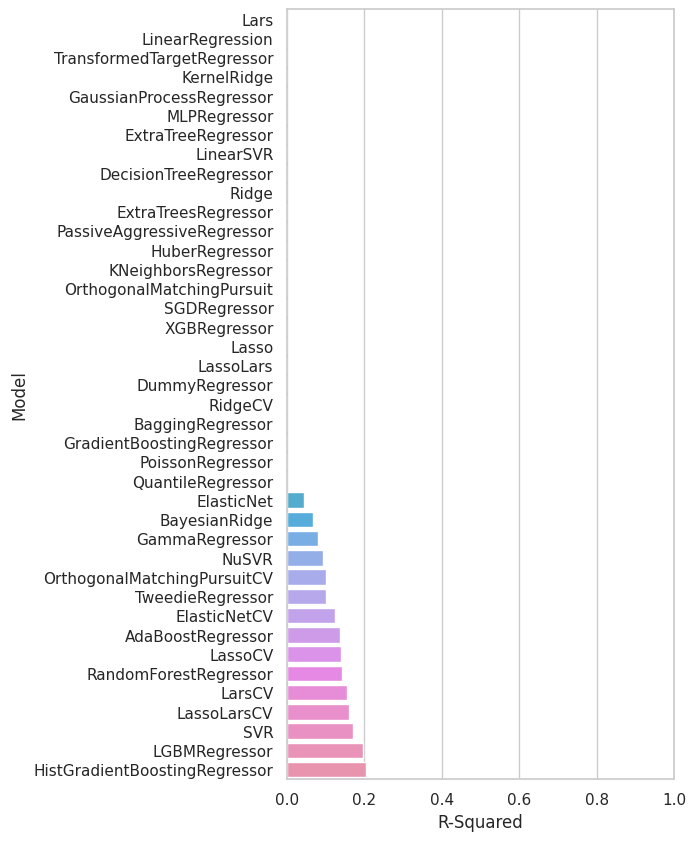

In [20]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

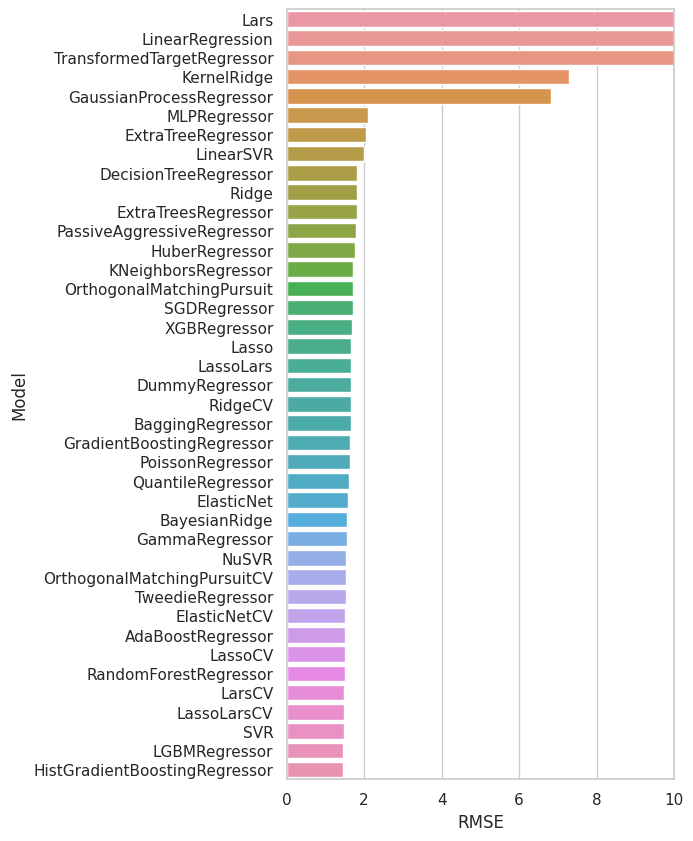

In [21]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

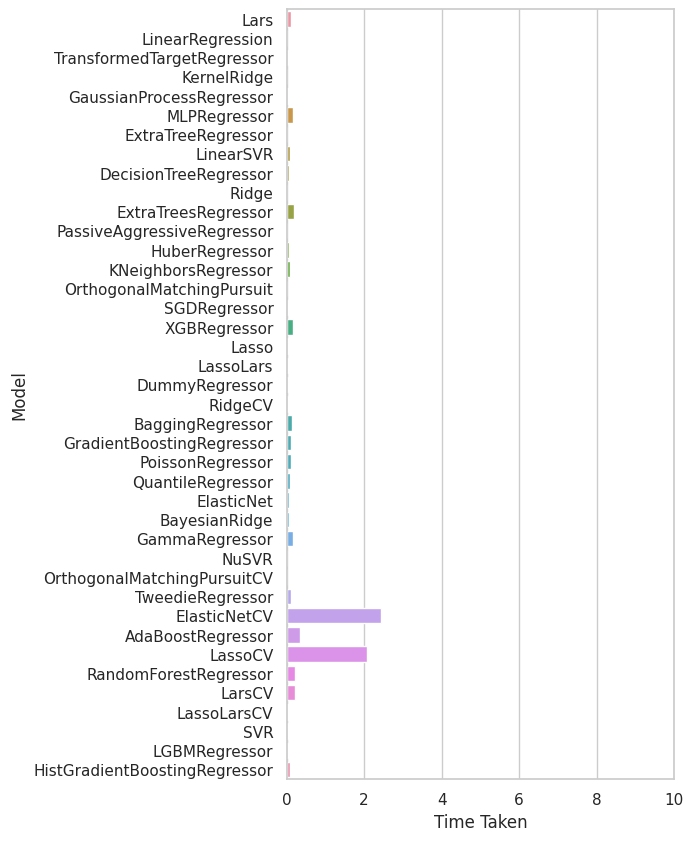

In [22]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions)
ax.set(xlim=(0, 10))